In [21]:
from transformers import CLIPProcessor, CLIPModel
from IPython.display import display
import numpy as np

In [23]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

clip_model = clip_model.to(device)

In [28]:
def load_image_paths(image_paths_file):
    with open(image_paths_file, 'r') as f:
        image_paths = f.readlines()
    image_paths = [path.strip() for path in image_paths]
    return image_paths

def process_text(text):
    inputs = clip_processor(
        text=text,
        return_tensors="pt"
    )
    
    for key in inputs.keys():
        inputs[key] = inputs[key].to(device)
    
    text_features = clip_model.get_text_features(input_ids=inputs.input_ids, attention_mask=inputs.attention_mask)

    return text_features

def get_images(image_paths, text_query):
    text_features = process_text(text_query)
    
    max_score = -float('inf')
    max_image_path = None
    max_image = None
    
    for i, image_path in enumerate(image_paths):
        image_embedding = image_embeddings_tensor[i]
        similarity_score = torch.nn.functional.cosine_similarity(image_embedding, text_features)
        
        if similarity_score > max_score:
            max_score = similarity_score
            max_image_path = image_path
            max_image = Image.open(image_path)
    
    return max_image_path, max_image, max_score.item() if max_image_path else None

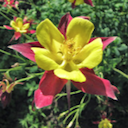

In [31]:
image_paths = load_image_paths("image_paths.txt")

image_embeddings_tensor = torch.load("image_embeddings.pt")
image_embeddings_tensor = image_embeddings_tensor.to(device)

image_path, image, similarity_score = get_images(image_paths, "Red Flower with Yellow Petals")

if image_path:
    display(image)
else:
    print("No matching image found.")